# iLykei Lecture Series 

# Machine Learning

# Support Vector Machines

# Workshop 1

## Y.Balasanov, L.Nazarov &copy; iLykei 2017-2022


This is Python version of Week 8 Workshop 1. Below is the list of packages used in the workshop.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from numpy.random import normal,random,binomial,seed,choice
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss

Introduction
============

Support Vector learning is based on simple, but deep ideas which originated in statistical learning theory. The simplicity comes from the fact that Support Vector Machines (SVMs) apply a simple linear method to the data but in a high-dimensional feature space which is non-linearly related to the input space.    
Even though we can think of SVMs as a linear algorithm in a high-dimensional space, in practice, it does not involve any computations in that high dimensional space. The only necessary operation is dot product.    
This simplicity combined with outstanding performance on many learning problems (classification, regression, and pattern recognition) has contributed to the popularity of the SVM.  
SVM related Python software can be found in [Scikit-Learn](http://scikit-learn.org/stable/modules/svm.html) package.

Maximal Margin Classifier
========================

The idea underlying Maximal margin classifier is easy and intuitive. It was suggested by Vladimir N. Vapnik and Alexey Ya. Chervonenkis in 1963. Their approach to solving binary classification problem may be roughly sketched as follows.     
We are looking for two parallel hyperplanes $H_1$, $H_2$, separating two classes with maximal distance between $H_1$ and $H_2$.     
The set of points equidistant from $H_1$ and $H_2$ is called maximal margin classifier or optimal separating hyperplane. Margin here is the distance between $H_1$ and $H_2$.  
Draw two-dimensional picture illustrating these concepts. Suppose elements of the classes have two numerical features. So we can treat them as points on the plane. Elements of the first class are red.

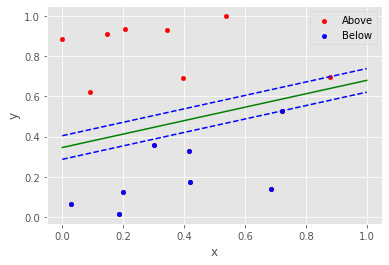

In [2]:
seed(1)
a = b = 1/3
x = random(100)
y = random(100)
def myLine(x,y): return y - a*x - b
above = myLine(x,y) > 0
m = 8
xAb = x[above][:m]
yAb = y[above][:m]
xBe = x[~above][:m]
yBe = y[~above][:m]
easyData = pd.DataFrame({'y': np.append(yAb,yBe),'x': np.append(xAb,xBe),
                         'Position': ["Above"]*m + ["Below"]*m})
nAb = np.argmin(myLine(xAb,yAb))
nBe = np.argmax(myLine(xBe,yBe))
bAb = yAb[nAb] - a*xAb[nAb]
bBe = yBe[nBe] - a*xBe[nBe]
ax = easyData.plot(x='x',y='y',kind='scatter',color='red',label='Above')
easyData[m:].plot(x='x',y='y',kind='scatter',color='blue',label='Below',ax=ax)
ax.plot([0,1],[bAb,a+bAb],'--',color = 'blue')
ax.plot([0,1],[bBe,a+bBe],'--',color = 'blue')
ax.plot([0,1],[(bAb+bBe)/2,a+(bAb+bBe)/2],color='green')

Blue dashed lines are hyperplanes $H_1$ and $H_2$. Green solid line is optimal separating hyperplane. The observation points on $H_1$ or $H_2$ are called support vectors.  

Linear SVM
==========

Consider binary classification problem with class labels $Y = \{ -1,1 \}$ and a learning sample $L^n = {(x_1,y_1),..,(x_n,y_n)}$.     
The goal is finding the maximum-margin hyperplane that divides the classes so that the distance between the hyperplane and the nearest point from either class is maximized.  
A hyperplane equation is 
$$w \cdot x-b=0,$$ 
where $w \cdot x$ is dot product  and $w$ is orthogonal vector to hyperplane.    
If the learning sample is linearly separable, we can select two parallel hyperplanes with the equations 
$$
w \cdot x-b=1,\; w \cdot x-b=-1
$$
that separate the data into two classes, so that the distance between them is as large as possible. Geometrically, the distance between these two hyperplanes is $\frac{2}{\left\Vert w\right\Vert }$, so the goal is to minimize $\left\Vert w\right\Vert$ with the constraints
$$
y_i\left( w \cdot x_i-b\right) \geqslant 1, \; i=1,...,n
$$
Maximum-margin hyperplane is completely determined by the points from both classes with nearest location to it. These  points are called support vectors.      

Unfortunately often the data are not linearly separable. In order to extend the method to such cases the hinge loss function was introduced 
$$h_i(w)=\max_{1\leqslant i\leqslant n} (0,1-y_i\left( w \cdot x_i-b\right)).$$ 
It imposes penalty proportional to the distance from the margin on misclassified points.     

Minimization of loss function
$$
L(w) = \sum_{i=1}^{n}h_{i}(w)+\lambda \left\Vert w\right\Vert ^{2}
$$
gives solution $w^*(\lambda )$, dependent on $\lambda$. Larger $\lambda$ increases margin but may reduce the number of points on the correct side of it.  


Support Vector Machines
=======================

B. Boser, I. Guyon, and V. Vapnik  (1992) suggested a way of creating nonlinear classifiers by applying the kernel trick based on transformation of input space $\phi$ and the kernel $K$. They are related as $$K(x_1,x_2)=(\phi (x_1) \cdot \phi (x_2)).$$ 
The resulting algorithm is formally similar, except that every dot product is replaced by a non-linear kernel function.  
Some common kernels include:  
* Polynomial (homogeneous): $K(x_i,x_j)=(x_i \cdot x_j)^d$  
* Polynomial (inhomogeneous): $K(x_i,x_j)=(x_i \cdot x_j + 1)^d$  
* Gaussian radial basis function: $K(x_i,x_j)=\exp(-\gamma \|x_i - x_j\|^2),$ for $\gamma > 0$. Sometimes parameterized using $\gamma=\frac{1}{2 \sigma^2}$  
* Hyperbolic tangent: $K(x_i,x_j)=\tanh(\kappa x_i \cdot x_j+c),$ for some (not every) $\kappa > 0$  and  $c < 0$     

Watch [visualisation of kernel trick](https://www.youtube.com/watch?v=3liCbRZPrZA)    

To learn more about SVM watch an excellent lecture by [Patrick Henri Winston at MIT OpenCourseWare](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-034-artificial-intelligence-fall-2010/lecture-videos/lecture-16-learning-support-vector-machines/). 

The basic Scikit-Learn SVM-related classes are [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), [LinearSVR](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR), [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), [SVR](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR). The first two contain linear SVM methods while the other two can deal with nonlinear kernels.  

Regression
==========

Example. Predicting Baseball Players' Salaries
-----------

Use the Hitters data from the ISLR library for a simple example

In [3]:
URL = 'https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Hitters.csv'

Remove missing entries and take logs

In [4]:
# Read and remove incomplete cases 
Hitters = pd.read_csv(URL,index_col=0).dropna()
# log transform Salary to make it a bit more normally distributed
Hitters['Salary'] = np.log(Hitters.Salary)
Hitters.head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,6.163315,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,6.173786,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,6.214608,N


Fit the model using [sklearn.svm.SVR](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR.fit) class. This implementation does not work with categorical features. Replace them with integer ones by the aid of [*sklearn.preprocessing.LabelEncoder*](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) before fitting.

In [5]:
le = LabelEncoder()
for col_name,col_type in zip(list(Hitters),Hitters.dtypes):
    if col_type=='object':
        print('encode column',col_name)
        Hitters[col_name] = le.fit_transform(Hitters[col_name])   
Hitters.head(3)

encode column League
encode column Division
encode column NewLeague


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,6.163315,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,6.173786,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,6.214608,1


Initialize regressor and fit the model.

In [6]:
SVR_Salary = SVR(gamma = 'auto')
X, y = Hitters.drop('Salary',axis=1),Hitters.Salary
SVR_Salary.fit(X, y)
print('coefficient of determination R^2 =',SVR_Salary.score(X, y))

coefficient of determination R^2 = 0.9216350954754686


With even default parameters and automatic choice of the kernel parameter `gamma` we got better result than random forest (see previous lecture).


Example. Large Number of Predictors
-------------------------

Consider the example analysed in the workshop Linear Regression with Large Number of Predictors. Simulate data

In [7]:
N = 500
np.random.seed(0)
Epsilon = np.random.normal(size=N)
X = pd.DataFrame(np.random.normal(0, 2, size=(N,N))).add_prefix('X')
slopesSet = np.random.uniform(1,3,N)
Y = [1 + X.iloc[:,:z] @ slopesSet[:z] + Epsilon for z in np.arange(1,N)]
X.head(5)
m = 440
X,y = X.iloc[:,:m],Y[m-1]

Fit *LinearSVR* model.

In [8]:
SVR_many_reg = LinearSVR(random_state=0)
print ('Support Vector Regressor model CV MSE = ',
       -np.mean(cross_val_score(SVR_many_reg, X, y, n_jobs = -1,
                                scoring='neg_mean_squared_error',cv=10)))

Support Vector Regressor model CV MSE =  42.77077875848069


Far from linear regression but much better than any of the tree methods.


Classification
==============

Scikit-Learn SVM-related classes has no built-in visualization methods. The example showing how to plot the decision surface can be found in [documentation](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html). Below we use for visualization the following *plot_svc* function, forked from [here](http://nbviewer.jupyter.org/github/JWarmenhoven/ISL-python/blob/master/Notebooks/Chapter%209.ipynb#9.6.1-Support-Vector-Classifier).

In [9]:
def plot_svc(clf, X, y, pad = 0.1, h = .02 ):
    """ Plot boundary of sklearn SVC classifier.
    
    Parameters
    ----------
    X: array-like
        Data that used to decide the range of plot.
    y: target
    svc: sklearn SVC classifier
        The SVC classifier of which you want to draw the boundary.
    """
    # Generate points in the range of data.
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Caculate the value of decision function of those points.
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()    


## Simple example    

Create a classification example with 4 points and 2 classes.

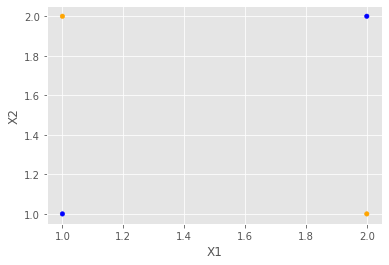

In [10]:
dat = pd.DataFrame({'X1':[1,2,2,1],'X2':[1,1,2,2],'Class':[1,0,1,0]})
_ = dat.plot(x='X1',y='X2',kind='scatter',
         color=np.array(["orange","blue"])[dat.Class.values])

##### 1. Fit SVM classifier with linear kernel.

In [11]:
m1 = LinearSVC()
X,y = dat[['X1','X2']].values,dat.Class
m1.fit(X,y)
print(m1.predict(X))

[0 0 0 0]


Linear kernel did not work because points are not linearly separable.

##### 2.Use polynomial kernel of degree 2.

Parameter $C$ below is regularization parameter with defaullt value 1. The strength of the regularization is inversely proportional to $C$. We will begin with $C = 0.5$.

[0 0 1 0]


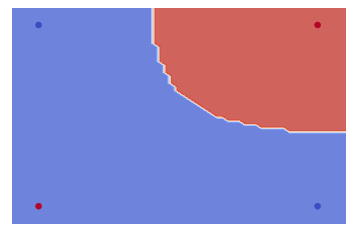

In [12]:
m1 = SVC(kernel='poly', degree=2, C=.5)
m1.fit(X,y)
print(m1.predict(X))
plot_svc(m1,X,y)

Only one point was classified correctly. Relax regularization.

[1 0 1 0]


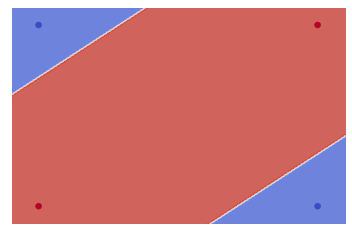

In [13]:
m1 = SVC(kernel='poly', degree=2,C=100)
m1.fit(X,y)
print(m1.predict(X))
plot_svc(m1,X,y)

Second degree polynomial with weak regularization gives correct solution.    

##### 3. Use polynomial kernel with degree 3.

[1 0 1 0]


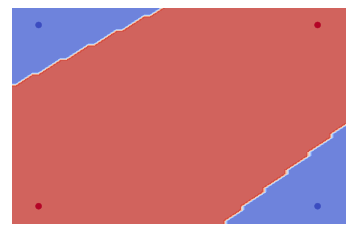

In [14]:
m1 = SVC(kernel='poly', degree=3, C=0.1)
m1.fit(X,y)
print(m1.predict(X))
plot_svc(m1,X,y)

Obviously, higher polynomial degree provides better classification.    

##### 4. Use radial or Gaussian kernel *RBF* (= Radial Basis Function).
We may not set it as parameter since it is default kernel for *SVC*.

[1 0 1 0]


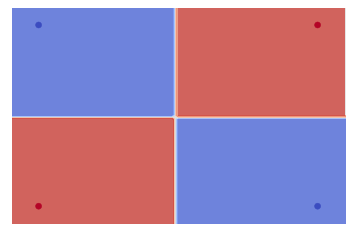

In [15]:
m1 = SVC()
m1.fit(X,y)
print(m1.predict(X))
plot_svc(m1,X,y)

This kernel is the most universal.    

Sine wave example
-------------------------

Use simple example from lecture 7 with a trigonometric signal, plus noise.    
Make one class a sine wave and another - a cosine wave.

In [16]:
seed(0)
x = np.arange(0, 2*np.pi, .01)
sigmaEps = .5
eps = normal(0,sigmaEps,len(x))
# use DataFrame.from_items to preserve column order
data1 = pd.DataFrame({'x': x, 'signal': np.sin(x) + eps})
data1.head()

,x,signal
0,0.00,0.882026
1,0.01,0.210078
2,0.02,0.509368
3,0.03,1.150442
4,0.04,0.973768


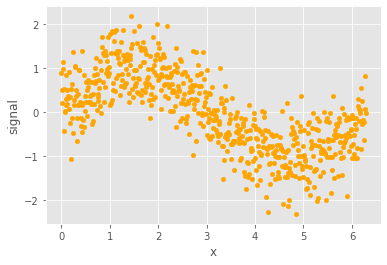

In [17]:
ax = data1.plot(x='x',y='signal',kind='scatter',color="orange")

<AxesSubplot:xlabel='x', ylabel='signal'>

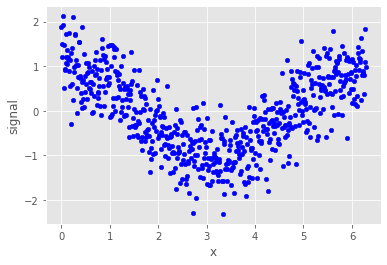

In [18]:
data2 = pd.DataFrame({'x': x, 'signal': np.cos(x) + eps})
data2.plot(x='x',y='signal',kind='scatter',color="blue")

Plot the data together.

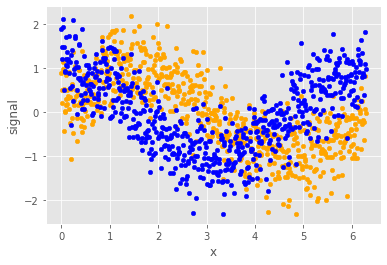

In [19]:
data2.plot(x='x',y='signal',kind='scatter',color="blue",ax=ax)
ax.get_figure()

Combine the data in one data frame

In [20]:
data1['class'] = 0
data2['class'] = 1
dataClasses = data1.append(data2)
dataClasses.head()

<ipython-input-20-eb68fc8ed8af>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataClasses = data1.append(data2)


,x,signal,class
0,0.00,0.882026,0
1,0.01,0.210078,0
2,0.02,0.509368,0
3,0.03,1.150442,0
4,0.04,0.973768,0


### SVM with radial kernel   

Radial kernel is the default:
$$K(u,v)=e^{-\gamma |u-v|^2}.$$

[1 1 1 1 1]


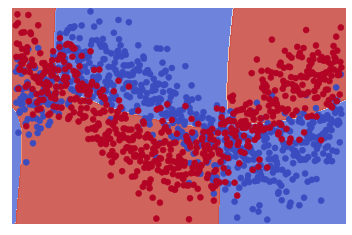

In [21]:
svmFit_radial = SVC()
X,y = dataClasses[['x','signal']].values,dataClasses['class'].values
svmFit_radial.fit(X,y)
print(svmFit_radial.predict(X)[:5])
plot_svc(svmFit_radial,X,y)

### SVM with sigmoid kernel    

Sigmoid kernel:
$$K(u,v)=\tanh(\gamma u \cdot v + coef_0).$$

[1 1 1 1 1]


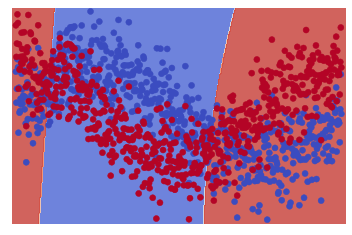

In [22]:
svmFit_sigmoid = SVC(kernel='sigmoid', C = .1)
svmFit_sigmoid.fit(X,y)
print(svmFit_sigmoid.predict(X)[:5])
plot_svc(svmFit_sigmoid,X,y)

### SVM with linear kernel     

Linear kernel has formula
$$K(u,v)=u \cdot v.$$

[1 1 1 1 1]


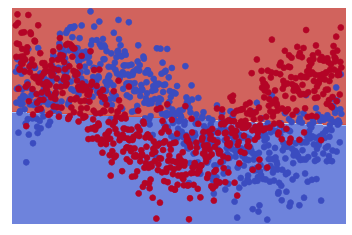

In [23]:
svmFit_sigmoid = SVC(kernel='linear')
svmFit_sigmoid.fit(X,y)
print(svmFit_sigmoid.predict(X)[:5])
plot_svc(svmFit_sigmoid,X,y)

### SVM with polynomial kernel     

Use polynomial kernel of degree 3 (default)
$$K(u,v)=(\gamma u \cdot v + coef_0)^d,$$
where $d=3$ is the degree of polynomial.

[1 1 1 1 1]


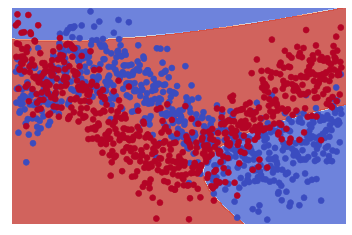

In [24]:
svmFit_poly = SVC(kernel='poly')
svmFit_poly.fit(X,y)
print(svmFit_poly.predict(X)[:5])
plot_svc(svmFit_poly,X,y)

Polynomial kernel of degree 2 gives:

[1 1 1 1 1]


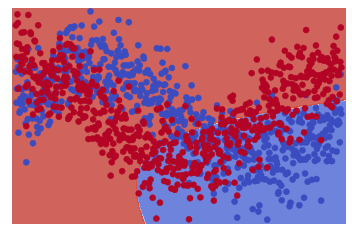

In [25]:
svmFit_poly = SVC(kernel='poly',degree=2)
svmFit_poly.fit(X,y)
print(svmFit_poly.predict(X)[:5])
plot_svc(svmFit_poly,X,y)

Polynomial kernel of degree 4 gives:

[1 1 1 1 1]


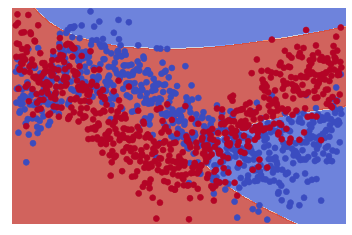

In [26]:
svmFit_poly = SVC(kernel='poly',degree=4)
svmFit_poly.fit(X,y)
print(svmFit_poly.predict(X)[:5])
plot_svc(svmFit_poly,X,y)

Example. Galton's data
-------------------------

Galton's data on the heights of parents and their children can be found in the package **HistData**.     
This data set lists the individual observations for 934 children in 205 families on which Galton (1886) based his cross-tabulation.

In [27]:
GaltonFamilies = pd.read_csv('Galton_data.csv')
GaltonFamilies.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,001,78.5,67.0,75.43,4,2,female,69.2
2,001,78.5,67.0,75.43,4,3,female,69.0
3,001,78.5,67.0,75.43,4,4,female,69.0
4,002,75.5,66.5,73.66,4,1,male,73.5


Families are listed in decreasing order of `midparentHeight`. Reshuffle them to ensure correct cross validation procedure later.

In [28]:
GaltonFamilies = shuffle(GaltonFamilies,random_state=0
                                        ).reset_index(drop=True)

Note that mid-parent height is calculated as 
$$ midparentHeight = (father + 1.08*mother)/2.$$     

Predict gender of the child by her or his height and mid-parent height.     
Plot the data scatterplot.

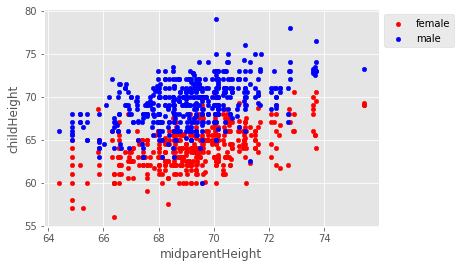

In [29]:
gender = GaltonFamilies.gender == "female"
ax = GaltonFamilies[gender].plot(x='midparentHeight',y='childHeight',
                                 kind='scatter',color='red')
GaltonFamilies[~gender].plot(ax=ax,x='midparentHeight',y='childHeight',
                             kind='scatter',color="blue")
ax.legend(['female','male'],bbox_to_anchor=(1, 1))

Recall that logistic regression classification accuracy of this data, calculated in the lecture Classification and Regression Trees was 0.887.  

Since the method is sensitive to the size of predictors scale them with *StandardScaler*.

In [30]:
clf = SVC()
X = StandardScaler().fit_transform(GaltonFamilies[['midparentHeight','childHeight']])
svc_score = cross_val_score(clf, X, gender,cv = 10)
print('Accuracy: mean =',np.mean(svc_score),',  standard deviation = ',
      np.std(svc_score))

Accuracy: mean = 0.883321894303363 ,  standard deviation =  0.03036277134020476


Accuracy is close to the one of logistic regression.  

Fit the model with default parameters to the data set and plot decision areas.

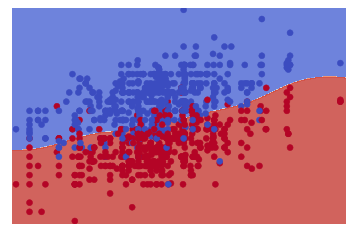

In [31]:
clf.fit(X,gender)
plot_svc(clf ,X,gender)

Now play with parameters of the method.     

Use the stadard Scikit-Learn tool for parameter tunning - [model_selection.GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV).      

Optimize for parameters `gamma` and `C`.    

It is important to understand the influence of these two parameters, because the accuracy of an SVM model is largely dependent on them.     

Argument `C` allows specifying the cost of a violation to the margin.  
If cost is too large, there is a high penalty for misclassified observation which leads to potential  overfitting.    
Conversely, if the cost is too small, the fit may be bad.
Argument `gamma` affects smoothness of the separating surface by setting limits for influence of each observation on neighbors.  
We will search parameters on the following grid.

In [32]:
# Parameters grid to search
param_test = {'gamma':.1**np.arange(1,5), 'C': 5*np.arange(1,5)}

Run search

In [33]:
grid = GridSearchCV(estimator = clf, param_grid = param_test, 
                    n_jobs=-1,cv=3)
grid.fit(X, gender)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([ 5, 10, 15, 20]),
                         'gamma': array([0.1   , 0.01  , 0.001 , 0.0001])})

Summarize search results.

In [34]:
# summarize results
for mean,param in zip(grid.cv_results_['mean_test_score'],grid.cv_results_['params']):
    print("%f with: " % mean,param)

0.887573 with:  {'C': 5, 'gamma': 0.1}
0.884365 with:  {'C': 5, 'gamma': 0.010000000000000002}
0.886498 with:  {'C': 5, 'gamma': 0.0010000000000000002}
0.747300 with:  {'C': 5, 'gamma': 0.00010000000000000002}
0.882218 with:  {'C': 10, 'gamma': 0.1}
0.881149 with:  {'C': 10, 'gamma': 0.010000000000000002}
0.883289 with:  {'C': 10, 'gamma': 0.0010000000000000002}
0.872585 with:  {'C': 10, 'gamma': 0.00010000000000000002}
0.883282 with:  {'C': 15, 'gamma': 0.1}
0.883286 with:  {'C': 15, 'gamma': 0.010000000000000002}
0.883293 with:  {'C': 15, 'gamma': 0.0010000000000000002}
0.875797 with:  {'C': 15, 'gamma': 0.00010000000000000002}
0.883282 with:  {'C': 20, 'gamma': 0.1}
0.883286 with:  {'C': 20, 'gamma': 0.010000000000000002}
0.881153 with:  {'C': 20, 'gamma': 0.0010000000000000002}
0.883293 with:  {'C': 20, 'gamma': 0.00010000000000000002}


Show the best score and correspondent parameters.

In [35]:
print("Best Accuracy after tunning: %f \nusing %s" % (grid.best_score_,grid.best_params_))

Best Accuracy after tunning: 0.887573 
using {'C': 5, 'gamma': 0.1}


Finally, fit best model to the data set and plot decision areas.

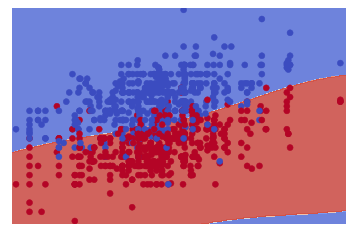

In [36]:
clf = SVC(C = grid.best_params_['C'],gamma = grid.best_params_['gamma'])
clf.fit(X,gender)
plot_svc(clf ,X,gender)

The line, separating classes became pretty close to straight line. The accuracy is almost the same as in logistic regression.

Example. Rectangular class domain
-------------------------

Simulate the data with rectangular class shape, like in lecture 6 when we examined tree classification.    
Each observation is three-dimensional vector with two numeric features and one categorical response (type) with possible values 'Positive' or 'Negative'.     
The goal is to predict type on the basis of first two features.     

Simulate the data.

In [37]:
N = 1000
xPos = 0.2
yMinPos = 0.2
yMaxPos = 0.7
seed(0)
newData = pd.DataFrame({'x':random(N),'y':random(N)})
newData['type'] = newData.apply(lambda s: 'Positive' if s['x']>xPos and s['y']>yMinPos 
                                and s['y']<yMaxPos else 'Negative',axis=1)

Add some noise giving random labels to 10% of the data.

In [38]:
n = N//10
newData.loc[choice(N,n,replace=False),
            'type'] = np.array(['Positive','Negative'])[binomial(1,0.5,n)]

Plot the data

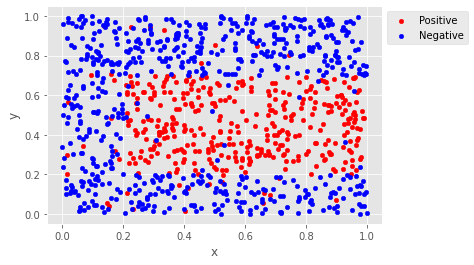

In [39]:
Type = newData['type'] == 'Positive'
ax = newData[Type].plot(x='x',y='y',kind='scatter',color='red')
newData[~Type].plot(ax=ax,x='x',y='y',kind='scatter',color="blue")
ax.legend(['Positive','Negative'],bbox_to_anchor=(1, 1))

Partition the data into train (2/3) and test (1/3) sets.    
Fit SVM model with default parameters to the data.    
Then try to improve the model, tuning `gamma` and `cost` parameters.   
Use different kernels and compare the results.   

* Create test and train samples by randomly selecting one third of observations as test and the rest as train samples; use *seed()* for better reproducibility. 
* Fit SVM to train data with some `gamma`, `C` and a choice of kernel       
* Predict type of the test data with actual column `type` excluded    
* Calculate confusion table    

<span style="color:red">(Skipped Code)</span>

In [40]:
xTrain,xTest,y_train,y_test = train_test_split(newData[['x','y']],Type,
                                               test_size=0.33,random_state=0)
svmFit = SVC().fit(xTrain,y_train)
svmPred = svmFit.predict(xTest)
confusion_matrix(y_test, svmPred)

array([[185,  10],
       [ 14, 121]])

Continue by tuning the parameters using function *GridSearchCV*.    

* Select ranges for `gamma` and `C`    
* Run *GridSearchCV* to search for the optimal setting on the grid    

<span style="color:red">(Skipped Code)</span>

In [41]:
clf = SVC()
param_test = {'gamma':.1**np.arange(1,5), 'C': 5*np.arange(1,5)}
grid = GridSearchCV(estimator = clf, param_grid = param_test, 
                    n_jobs=-1,cv=3)
grid.fit(xTrain, y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([ 5, 10, 15, 20]),
                         'gamma': array([0.1   , 0.01  , 0.001 , 0.0001])})

Observe the summary of the search

In [42]:
for mean,param in zip(grid.cv_results_['mean_test_score'],grid.cv_results_['params']):
    print("%f with: " % mean,param)

0.632834 with:  {'C': 5, 'gamma': 0.1}
0.632834 with:  {'C': 5, 'gamma': 0.010000000000000002}
0.632834 with:  {'C': 5, 'gamma': 0.0010000000000000002}
0.632834 with:  {'C': 5, 'gamma': 0.00010000000000000002}
0.685151 with:  {'C': 10, 'gamma': 0.1}
0.632834 with:  {'C': 10, 'gamma': 0.010000000000000002}
0.632834 with:  {'C': 10, 'gamma': 0.0010000000000000002}
0.632834 with:  {'C': 10, 'gamma': 0.00010000000000000002}
0.737388 with:  {'C': 15, 'gamma': 0.1}
0.632834 with:  {'C': 15, 'gamma': 0.010000000000000002}
0.632834 with:  {'C': 15, 'gamma': 0.0010000000000000002}
0.632834 with:  {'C': 15, 'gamma': 0.00010000000000000002}
0.816277 with:  {'C': 20, 'gamma': 0.1}
0.632834 with:  {'C': 20, 'gamma': 0.010000000000000002}
0.632834 with:  {'C': 20, 'gamma': 0.0010000000000000002}
0.632834 with:  {'C': 20, 'gamma': 0.00010000000000000002}


Plot the results of classification.

/home/yuri/anaconda3/envs/env_bnlearn/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


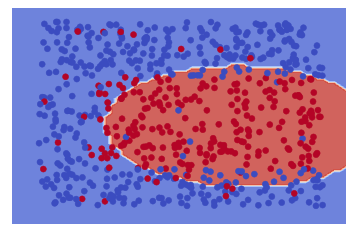

In [43]:
clf = SVC(C = grid.best_params_['C'],gamma = grid.best_params_['gamma'])
clf.fit(xTrain, y_train)
plot_svc(clf, xTrain.values, y_train.values)

Predict the type and calculate accuracy of the tuned model.

In [44]:
pred = clf.predict(xTest)
accuracy_score(y_test,pred)

0.8727272727272727

**Summary**.    

The last two examples have been already used in lecture 6.     
Logistic regression classified better the Galton's data, but did poorly on rectangular class boundary shape.    
Tree methods did not work well with the Galton's data but successfully identified rectangular class domain.   
SVM appears to be rather flexible showing good accuracy in both cases.   

Otto Product Classification Example
-----------------------------------

Consider again Otto Group Product Classification Example and compare SVM results with performance of random forest and gradient boosting.     

## Data

Load the data set.

In [45]:
Data = pd.read_csv('DTTrain.csv')
# dataset dimensions
print(Data.shape)
# data content
Data.head()

(10233, 95)


,time,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,45652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Class_5
1,225646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,Class_3
2,345735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,7.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,Class_5
3,436478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Class_5
4,478129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Class_5


Partition data into train (2/3) and test (1/3) sets.

In [46]:
xTrain,xTest,y_train,y_test = train_test_split(Data.drop(['time','target'],axis=1),
                              Data.target,test_size=0.33,random_state=0)

## Fitting SVM   

Fit *SVC* to the train data and make prediction on the test data.     
Class *SVC* constructor has logical parameter `probability` indicating whether to enable probability estimates. This must be enabled prior to calling *fit*, and will slow down that method.

In [47]:
clf = SVC(probability = True)
clf.fit(xTrain, y_train)

SVC(probability=True)

If probability is True, `predict_proba()` method computes probabilities of possible outcomes for samples.

In [48]:
proba = clf.predict_proba(xTest)
proba[:3]

array([[2.48684233e-02, 5.81726184e-05, 3.23827054e-04, 3.80126770e-05,
        9.74711564e-01],
       [3.53480429e-02, 2.02677201e-02, 9.83506326e-03, 9.06177914e-01,
        2.83712600e-02],
       [1.08114044e-02, 9.35323612e-01, 3.12584278e-03, 2.77615770e-02,
        2.29775633e-02]])

Use Multiclass logloss for estimating prediction quality. Calculate accuracy and logloss.

In [49]:
print('logloss = ',log_loss(y_test,proba))
predict = clf.predict(xTest)
conf = confusion_matrix(y_test,predict)
print('accuracy = ',np.trace(conf)/np.sum(conf))

logloss =  0.3135582244947931
accuracy =  0.8889546935149542


With default parameters SVM outperforms random forest and gradient boosting.     
However, it is still not easy to select the right method for the data: there are many parameters to be tuned, especially in SVM and gradient boosting.   

Advantages and Disadvantages of SVM
============================

According to the [documentation of scikit-learn Python package](http://scikit-learn.org/stable/modules/svm.html) the advantages of support vector machines are:  

* Effective in high dimensional spaces
* Never gets trapped in local minima
* Still effective in cases where number of dimensions is greater than the number of samples  
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient  
* Versatile: different Kernel functions can be specified for the decision function  

The disadvantages of support vector machines include:  

* SVM may overfit  
* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation    
* SVM does not return importance of features